# Darwin's Finch Beak Evolution Analysis

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. 
Using EDA and statistical inference, we will witness first hand, through data, evolution in action.

We will be comparing Darwin's finches beck length and depth measurement collected in 1975 with 2012's data. The changes in the beck's dimension in these 37 years, will help us derive evolution in the particular species.

For our affirmation, to prove evolution, we will use statistics method like bootstrapping, parameter estimation and hypothesis test.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Loading the data
finch_beaks_1975 =pd.read_csv("../input/darwins-finches-evolution-dataset/finch_beaks_1975.csv")
finch_beaks_2012 =pd.read_csv("../input/darwins-finches-evolution-dataset/finch_beaks_2012.csv")

finch_beaks_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [3]:
finch_beaks_1975 = finch_beaks_1975.drop(['band'], axis = 'columns')
finch_beaks_1975['year'] = "1975"
finch_beaks_1975.rename(columns={'Beak depth, mm' : 'bdepth','Beak length, mm' : 'blength'},inplace=True)

finch_beaks_1975.head()

,species,blength,bdepth,year
0,fortis,9.4,8.0,1975
1,fortis,9.2,8.3,1975
2,fortis,9.5,7.5,1975
3,fortis,9.5,8.0,1975
4,fortis,11.5,9.9,1975


In [4]:
finch_beaks_2012 = finch_beaks_2012.drop(['band'], axis = 'columns')
finch_beaks_2012['year'] = "2012"
finch_beaks_2012.head()

,species,blength,bdepth,year
0,fortis,10.0,8.5,2012
1,fortis,12.5,8.9,2012
2,fortis,9.3,7.5,2012
3,fortis,10.3,9.6,2012
4,fortis,11.0,9.2,2012


In [5]:
finch_beaks_both = pd.concat([finch_beaks_1975,finch_beaks_2012]).reset_index(drop=True)
finch_beaks_both.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 4 columns):
species    651 non-null object
blength    651 non-null float64
bdepth     651 non-null float64
year       651 non-null object
dtypes: float64(2), object(2)
memory usage: 20.5+ KB


In [6]:
fortis_f = finch_beaks_both[finch_beaks_both.species == 'fortis'].reset_index(drop=True)
scandens_f = finch_beaks_both[finch_beaks_both.species == 'scandens'].reset_index(drop=True)

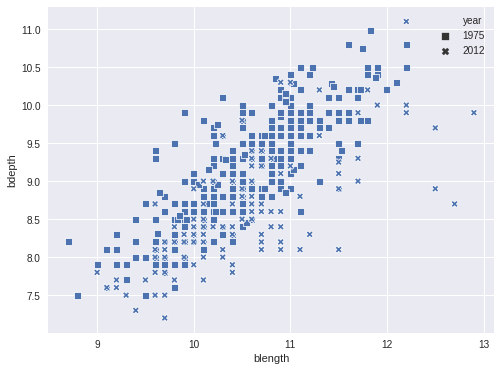

In [7]:
markers = {'1975': "s", '2012': "X"}
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'blength', y= 'bdepth', style = 'year', markers=markers, data=fortis_f)
plt.show()

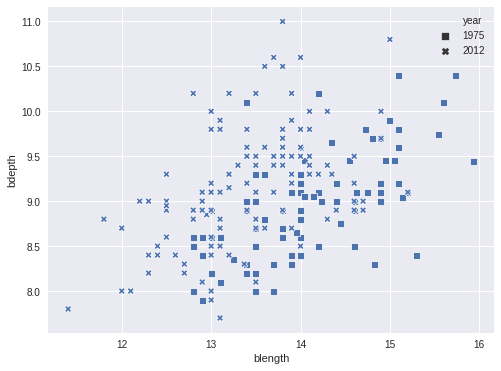

In [8]:
markers = {'1975': "s", '2012': "X"}
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'blength', y= 'bdepth', style = 'year', markers=markers, data=scandens_f)

plt.show()

From the scatter plots, we can say that the fortis finch beck size haven't changed majorly. While the scandens finch beck has changed over the time. Therfore, we will be concentrating on the scandens species.

In [9]:
scandens_1975 = finch_beaks_1975[finch_beaks_1975['species']=='scandens']
scandens_2012 = finch_beaks_2012[finch_beaks_2012['species']=='scandens']

# The depths of scandens beak
scandens_beak_depth_1975=scandens_1975['bdepth'].reset_index(drop=True)
scandens_beak_depth_2012=scandens_2012['bdepth'].reset_index(drop=True)

#The lengths of scandens beak
scandens_beak_length_1975=scandens_1975['blength'].reset_index(drop=True)
scandens_beak_length_2012=scandens_2012['blength'].reset_index(drop=True)

## Exploratory Data Analysis

EDA of beak depths of Darwin's scandens finches

For our first foray into the Darwin finch data, we will study how the beak depth (the distance, top to bottom) of the finch scandens species has changed over time.

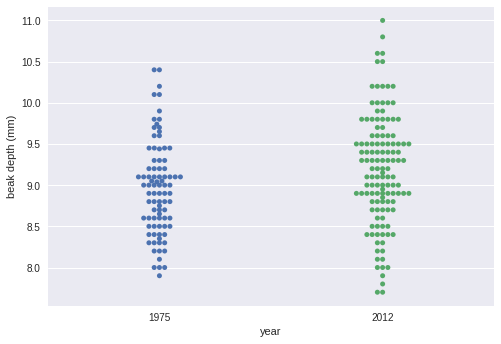

In [10]:
# Create bee swarm plot
sns.swarmplot(x='year', y='bdepth', data=scandens_f)

plt.xlabel('year')
plt.ylabel('beak depth (mm)')

plt.show()

From the swarm plot it is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance. We need to check the ECDFs.

### ECDF of the beak depths

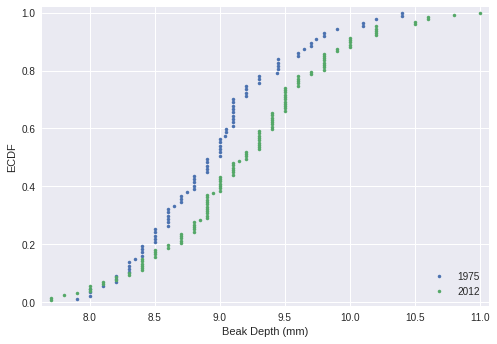

In [11]:
# ECDF calculation functiom
def ecdf(x_data) :
    x = np.sort(x_data)
    y = np.arange(1,len(x)+1) / len(x)

    return x,y

# Compute ECDFs
x_1975, y_1975 = ecdf(scandens_beak_depth_1975)
x_2012, y_2012 = ecdf(scandens_beak_depth_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

_ = plt.margins(0.02)
_ = plt.xlabel('Beak Depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

<Figure size 576x432 with 0 Axes>

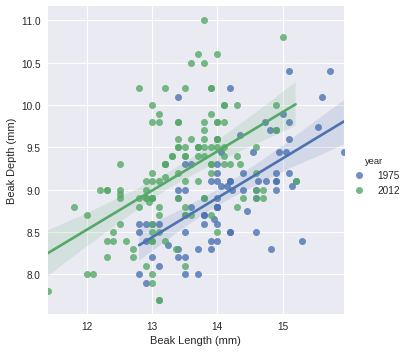

In [12]:
_ = plt.figure(figsize=(8,6))
_ = sns.lmplot(x='blength', y='bdepth', hue = 'year', data=scandens_f)
_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')

plt.show()

### Parameter estimates of the beak depths
We need estimate the difference of the mean beak depth of the scandens species from 1975 and 2012.

We will use bootstrapping method to replicate the data for a large number of time and report a 95% confidence interval.

In [13]:
# Bootstrap replicate function
def bs_reps(data,func,size=1) :

    bs_rep = np.empty(size)

    for i in range(size) :
        bs_rep[i] = func(np.random.choice(data,size=len(data)))
    return bs_rep

In [14]:
# Compute the difference of the both beak depth
mean_diff = np.mean(scandens_beak_depth_2012) - np.mean(scandens_beak_depth_1975)

# Now bootstrap both the depths using mean function for 10000 samples
bs_rep_1975 = bs_reps(scandens_beak_depth_1975,np.mean,size=10000)
bs_rep_2012 = bs_reps(scandens_beak_depth_2012,np.mean,size=10000)

# Compute the difference of the sample means
bootstrap_rep= bs_rep_2012 - bs_rep_1975

# Compute 95% confidence interval
conf_int = np.percentile(bootstrap_rep, [2.5, 97.5])

# Print the results
print('Difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

Difference of means = 0.2262204724409429 mm
95% confidence interval = [0.05927303 0.39547522] mm


We can see that from the plot of the ECDF and determination of the confidence interval that scandens beak have gotten deeper (increased). But it might be possible that this effect is just due to random chance? What is the probability that we would get the observed difference in mean beak depth if the means were the same? 

We need to perform a hypothesis test.

## Hypothesis test: Are beaks deeper in 2012?

The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [15]:
#Shifting the two data sets so that they have the same mean 
combined_mean = np.mean(np.concatenate((scandens_beak_depth_1975,scandens_beak_depth_2012)))

bd_1975_shift = scandens_beak_depth_1975 - np.mean(scandens_beak_depth_1975) + combined_mean
bd_2012_shift = scandens_beak_depth_2012 - np.mean(scandens_beak_depth_2012) + combined_mean

bs_rep_1975_shift = bs_reps(bd_1975_shift,np.mean,size=10000)
bs_rep_2012_shift = bs_reps(bd_2012_shift,np.mean,size=10000)

bs_shifted_mean_diff = bs_rep_2012_shift - bs_rep_1975_shift

#p value
p= np.sum(bs_shifted_mean_diff >= mean_diff) / len(bs_shifted_mean_diff)
print("p-value = ",p)

p-value =  0.0041


We get a very small p-value, i.e. there are very less number of occurrences where the difference between shifted trials is greater than the original one.

Previously, you got a difference of 0.2 mm between the means. This means in 37 years the beak depth increased by 0.2 mm which is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### EDA of beak length and depth

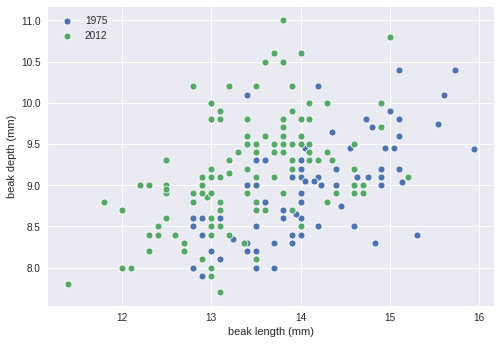

In [16]:
# Make scatter plot of 1975 & 2012 data
_ = sns.scatterplot(x= 'blength', y= 'bdepth',  data=scandens_1975)
_ = sns.scatterplot(x= 'blength', y= 'bdepth',  data=scandens_2012)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

plt.show()

From the plot, we can see that beaks got deeper (the green dots are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the green dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

## Linear Regression

In [17]:
# Linear regression funcion for pair bootstrap

def bs_pair_linreg(x,y,size=1) :
    indices = np.arange(len(x))
       
    slope_reps = np.empty(size)
    intercept_reps = np.empty(size)

    for i in range(size) :
        bs_indices = np.random.choice(indices,size=len(indices))
        bs_x,bs_y = x[bs_indices],y[bs_indices]
        slope_reps[i],intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return slope_reps,intercept_reps

In [18]:
# Compute the linear regressions on the original data
slope_1975,intercept_1975 = np.polyfit(scandens_beak_length_1975,scandens_beak_depth_1975,1)
slope_2012,intercept_2012 = np.polyfit(scandens_beak_length_2012,scandens_beak_depth_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_1975,bs_intercept_1975 = bs_pair_linreg(scandens_beak_length_1975,scandens_beak_depth_1975,1000)
bs_slope_2012,bs_intercept_2012 = bs_pair_linreg(scandens_beak_length_2012,scandens_beak_depth_2012,1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_1975,[2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_1975,[2.5,97.5])

print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.34341342 0.5935462 ]
1975: intercept = 2.3908752365842263 conf int = [0.59024228 4.0792484 ]
2012: slope = 0.462630358835313 conf int = [0.33670808 0.60615746]
2012: intercept = 2.977247498236019 conf int = [0.59024228 4.0792484 ]


### Displaying the linear regression results

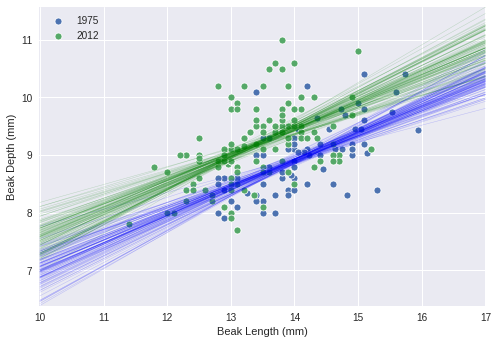

In [19]:
# Make scatter plot of 1975 & 2012 data
_ = sns.scatterplot(x= 'blength', y= 'bdepth',  data=scandens_1975)
_ = sns.scatterplot(x= 'blength', y= 'bdepth',  data=scandens_2012)

_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_1975[i] * x + bs_intercept_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_2012[i] * x + bs_intercept_2012[i],
             linewidth=0.5, alpha=0.2, color='green')

plt.margins(0.001)
plt.show()

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years.

### Beak length to depth ratio

1975: mean ratio = 1.5788823771858533 conf int = [1.55617552 1.60084505]
2012: mean ratio = 1.4658342276847778 conf int = [1.44432386 1.48805766]


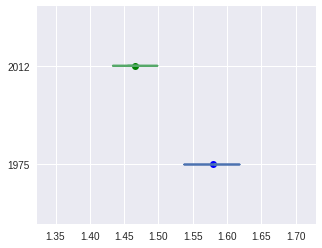

In [20]:
# Compute length-to-depth ratios
ratio_1975 = scandens_beak_length_1975 / scandens_beak_depth_1975
ratio_2012 = scandens_beak_length_2012 / scandens_beak_depth_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

_ = plt.figure(figsize=(5,4))
_ = plt.plot(mean_ratio_1975, 1975, 'ro', color = 'b')
_ = plt.plot(mean_ratio_2012, 2012, 'ro', color = 'green')

y5 = np.full((10000), 1975)
_ = plt.plot(bs_replicates_1975, y5)

y2 = np.full((10000), 2012)
_ = plt.plot(bs_replicates_2012, y2)

_ = plt.yticks([1975, 2012])
_ = plt.margins(0.6)

plt.show()

The mean beak length-to-depth ratio decreased by about **0.1, or 7%**, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.